In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 

In [68]:
df = pd.read_csv("Diabetes.csv")

In [69]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249044,253675,0,1,1,1,45,0,0,0,0,...,1,0,3,0,5,0,1,5,6,7
249045,253676,1,1,1,1,18,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
249046,253677,0,0,0,1,28,0,0,0,1,...,1,0,1,0,0,0,0,2,5,2
249047,253678,0,1,0,1,23,0,0,0,0,...,1,0,3,0,0,0,1,7,5,1


In [70]:
df.columns

Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [71]:
df.drop(columns=['NoDocbcCost', 'PhysHlth', 'DiffWalk','AnyHealthcare', 'CholCheck', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'Unnamed: 0',], inplace= True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249049 entries, 0 to 249048
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Diabetes_012  249049 non-null  int64
 1   HighBP        249049 non-null  int64
 2   HighChol      249049 non-null  int64
 3   BMI           249049 non-null  int64
 4   Smoker        249049 non-null  int64
 5   GenHlth       249049 non-null  int64
 6   MentHlth      249049 non-null  int64
 7   PhysHlth      249049 non-null  int64
 8   DiffWalk      249049 non-null  int64
 9   Sex           249049 non-null  int64
 10  Age           249049 non-null  int64
 11  Education     249049 non-null  int64
 12  Income        249049 non-null  int64
dtypes: int64(13)
memory usage: 24.7 MB


In [73]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

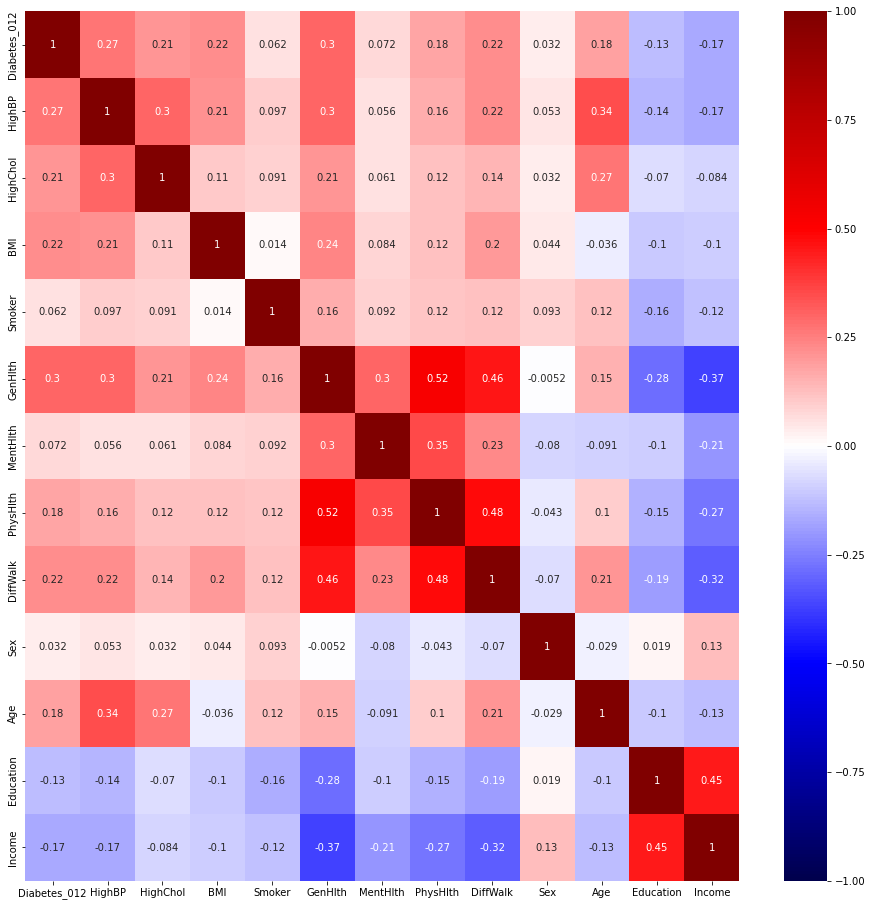

In [74]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


<Figure size 1152x1152 with 0 Axes>

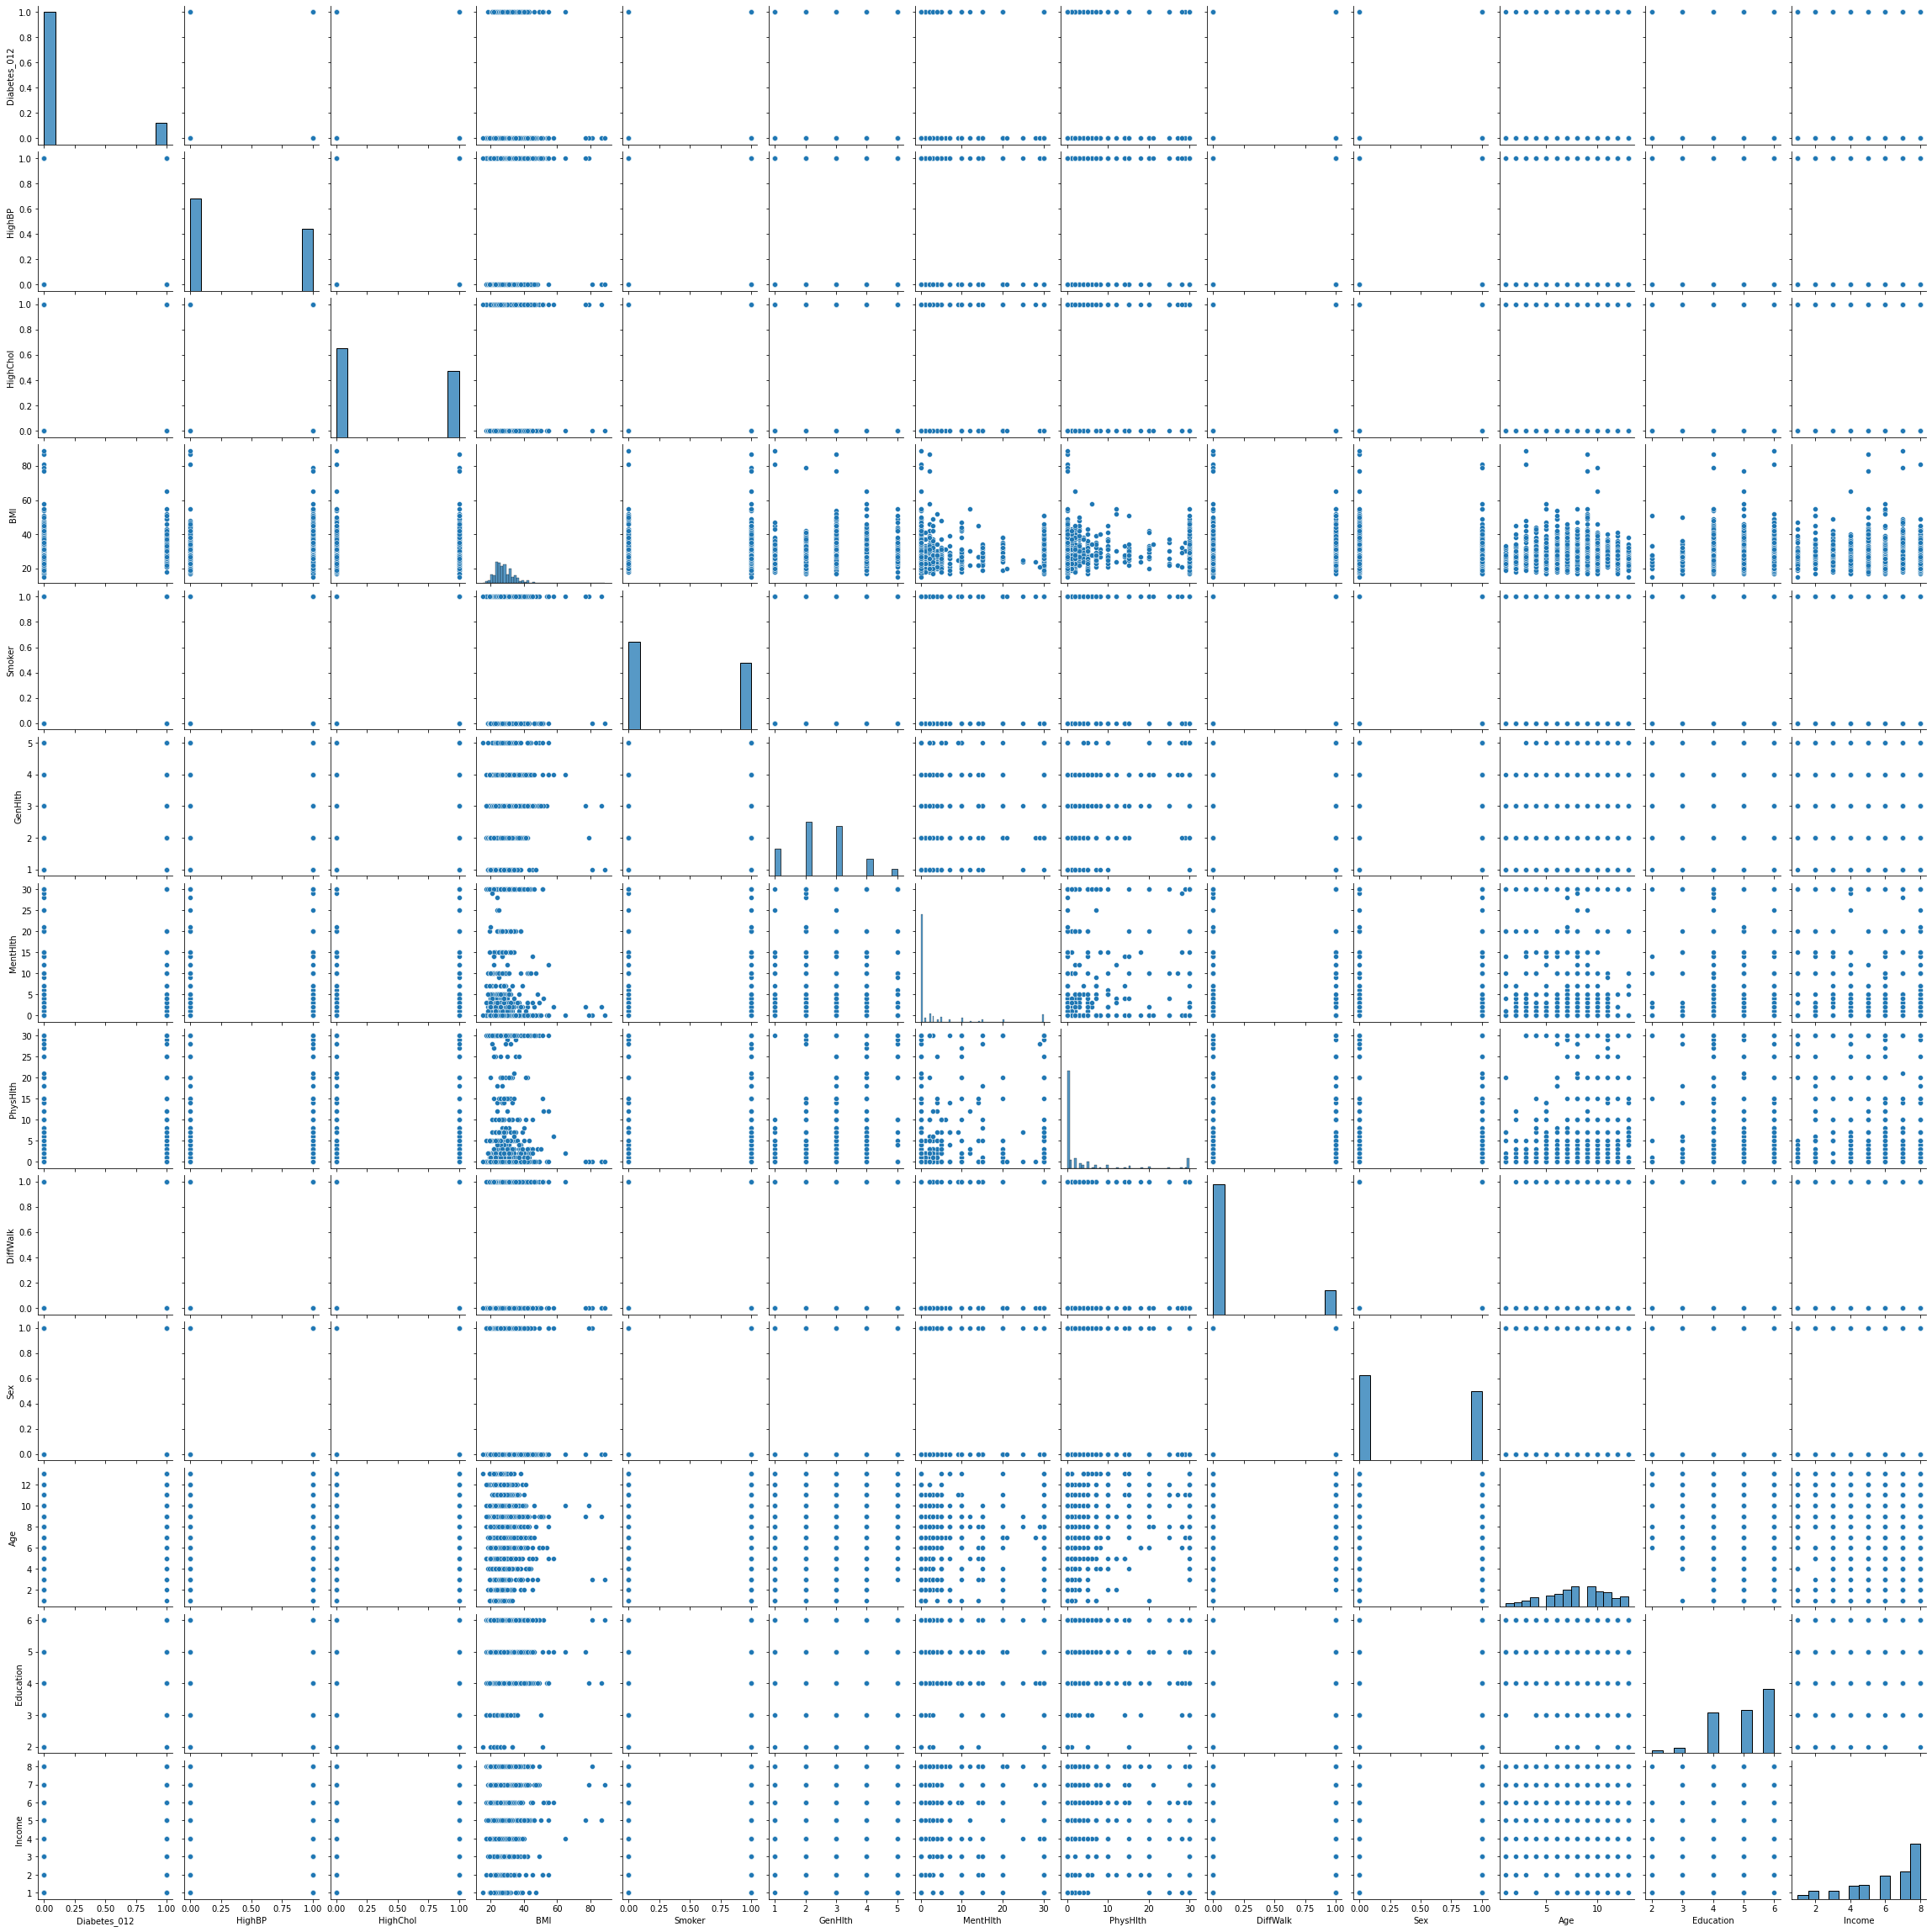

In [75]:
plt.figure(figsize=(16, 16))
sns.pairplot(df.sample(1000));


In [85]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [86]:
#Divide dataset into features and Traget variables
X= df.loc[:, "HighBP": "Income"]
y = df["Diabetes_012"]

In [87]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

0    0.858076
1    0.141924
Name: Diabetes_012, dtype: float64


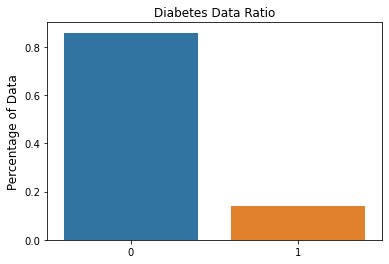

In [88]:
from sklearn.preprocessing import StandardScaler
target = df.Diabetes_012.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Diabetes Data Ratio')
plt.ylabel('Percentage of Data', fontsize=12);

# Split Data into Train and Test

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X_train.shape, y_train.shape


((186786, 12), (186786,))

# Over Sample Data to Fix Imbalance

In [91]:
import imblearn.over_sampling

# Set up for the ration argument of RandomOverSampler Initialization 
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

ratio = {1: n_pos *4, 0: n_neg}

In [92]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 42)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

_____________________________________________________________________________________________________________________

# RANDOM Forest Algorithm

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#create a Gaussian Classifier
random_forest_clf=rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight="balanced",random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train_rs,y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [94]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[41171 12266]
 [ 2535  6291]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     53437
           1       0.34      0.71      0.46      8826

    accuracy                           0.76     62263
   macro avg       0.64      0.74      0.65     62263
weighted avg       0.86      0.76      0.79     62263



In [95]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.7944434  0.79481885 0.79222827 0.80525624 0.80454289 0.80093861
 0.8022077  0.80224525 0.80048059 0.80183224]


In [96]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7922282710718979, 0.7998994059162309, 0.8052562417871222)

In [97]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.7623 
 Precision: 0.3390 
 Recall: 0.7128 
 F1: 0.4595


In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Random Hyperparameter Grid

In [99]:
from sklearn.model_selection import RandomizedSearchCV

#Number of Trees in random forest
n_estimators= [int(x) for x in np.linspace(start =200, stop = 2000, num = 10)]

#Number of features to consider at every split 
max_features = ["auto", "sqrt"]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)
#On each iteration, the algorithm will choose a difference combination of the features.

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Random Seach Training 


In [100]:
# Use the random grod to search for best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()

#Random search of parameters, using 3 fold cross validation 
#Search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 10,
                              cv=3,
                              verbose =2,
                              random_state =42,
                              n_jobs = -1)

#Fit the random search model
rf_random.fit(X_train_rs, y_train_rs)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time= 3.7min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 6.5min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 3.0min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.0min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=17.1min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

# View Best Paramters from fitting the Random Search 

In [101]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [104]:
random_forest_clf=rfc = RandomForestClassifier(n_estimators=400, 
                                               min_samples_split= 10,
                                               min_samples_leaf=  1,
                                               max_features= "sqrt",
                                               max_depth = 60,
                                               bootstrap= False)
rfc.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [105]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[48831  4606]
 [ 5905  2921]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     53437
           1       0.39      0.33      0.36      8826

    accuracy                           0.83     62263
   macro avg       0.64      0.62      0.63     62263
weighted avg       0.82      0.83      0.83     62263



In [106]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.90099493 0.90099493 0.90542519 0.9223578  0.92115637 0.9226957
 0.92074041 0.92021476 0.92017722 0.92137869]


In [107]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9009949314811339, 0.9156136005672089, 0.9226957011451098)

In [108]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.8312 
 Precision: 0.3881 
 Recall: 0.3310 
 F1: 0.3572


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
random_forest_clf.feature_importances_


array([0.10071701, 0.04917663, 0.19963916, 0.02515644, 0.1255914 ,
       0.06555092, 0.08572463, 0.03356711, 0.02203409, 0.13804199,
       0.06267779, 0.09212282])

In [110]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [116]:
feature_names= df.columns.drop([ 'Diabetes_012'])

In [117]:
import time

start_time = time.time()
importances = random_forest_clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in random_forest_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.550 seconds


Text(0, 0.5, 'Mean decrease in impurity')

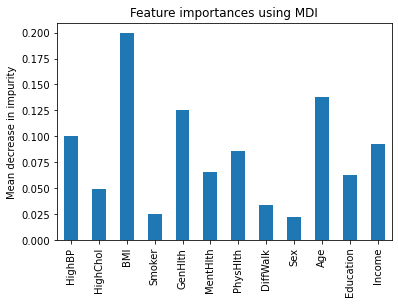

In [118]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [ ]:
#pairplot, high lineraly correlation makes model unstable. Relationships engneer

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    random_forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
make_confusion_matrix(random_forest_clf, threshold=0.5)


_____________________________________________________________________________________________________________________